# 

# 神经网络的学习

## 4.1 从数据中学习
### 4.1.1 数据驱动
### 4.1.2 训练数据和测试数据

机器学习中，一般将数据分为训练数据和测试数据两部分来进行学习和实验等。

首先，使用训练数据进行学习，寻找最优的参数；然后，使用测试数据评价训练得到的模型的实际能力。

为什么需要将数据分为训练数据和测试数据呢？因为我们追求的是模型的泛化能力。为了正确评价模型的泛化能力，就必须划分训练数据和测试数据。另外，训练数据也可以成为监督数据。

只对某个数据集过度拟合的状态称为过拟合（over fitting）。

## 4.2 损失函数

神经网络以某个指标为线索寻找最优权重参数。神经网络的学习中所用的指标称为损失函数（loss function）。这个损失函数可以使用任意函数，但一般用均方误差和交叉熵误差等。

### 4.2.1 均方误差

可以用作损失函数的函数有很多，其中最有名的是均方误差（mean squared error）。均方误差如下式所示。
$$
E = \frac{1}{2}\sum_k(y_k-t_k)^2        \qquad \qquad (4.1)
\\
其中，y_k表示神经网络的输出，t_k表示监督数据，k表示数的维数。
$$


In [4]:
import numpy as np


def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# 设2为正确解
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
e = mean_squared_error(np.array(y),np.array(t))

print(e)

y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
e = mean_squared_error(np.array(y),np.array(t))
print(e)

0.09750000000000003
0.5975


### 4.2.2 交叉熵误差

除了均方误差之外，交叉熵误差（cross entropy error）也经常用作损失函数。交叉熵误差如下：

$$
E = - \sum_k t_k \ln y_k         \qquad \qquad (4.2)

\\

其中y_k是神经网络的输出，t_k是正确解标签。并且，t_k中只有正确解的标签的索引为1，其它均为0。因此，式（4.2）实际上只计算对应正确解标签的输出的自然对数。
$$

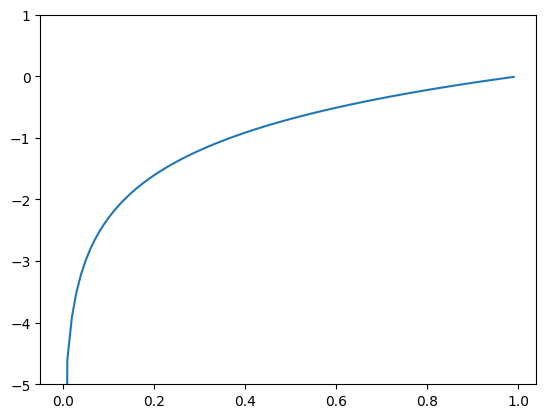

In [5]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(1e-7, 1.0, 0.01)
y = np.log(x)

plt.plot(x, y)
plt.ylim(-5.0, 1.0)
plt.show()

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
e = cross_entropy_error(np.array(y),np.array(t))
print(e)

y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
e = cross_entropy_error(np.array(y),np.array(t))
print(e)

0.510825457099338
2.302584092994546


### 4.2.3 mini-batch学习

使用训练数据进行学习，严格来说，就是针对训练数据计算损失函数的值，找出使其值尽可能小的参数。

$$

E = - \frac{1}{N} \sum_n \sum_k t_{nk} \log y_{nk}          \qquad \qquad \qquad (4.3)


\\ 
\\

其中，假设数据有N个，t_{nk}表示第n个数据的第k个元素的值（y_{nk}是神经网络的输出，t_{nk}是监督数据）。

\\

将单个数据的损失函数的式（4.2）扩大到了N份数据，最后除以N进行正规化。通过除以N，可以求单个数据的"平均损失函数"。通过这样的正规化，可以获得和训练数据的数量无关的统一指标。

$$

In [7]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train,t_train),(x_test, t_test) = load_mnist(normalize=True,one_hot_label=True)

print(x_train.shape)
print(t_train.shape)


train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(x_batch)
print(t_batch)



(60000, 784)
(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


### 3.2.4 mini-batch版交叉墒误差的实现


In [8]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

def cross_entropy_error_not_one_hot(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0] 
t = [2,7,0,9,4,1,3,1,1,0]
cross_entropy_error_not_one_hot(np.array(y),np.array(t))


51.637690132223575

### 4.2.4 为何要设定损失函数

* 需要评估模型匹配度或准确率。
* 以匹配度或者准确率进行评估容易得到0导数且变化不连续。 如准确度到达一定程度之后如80%，微小的调整准确率并不会变。即使变化也可能是80%到81这种非连续变化。
* 不具有通用性，不同问题的准确度并不能简单统一表示。

## 4.3 数值微分

梯度法使用梯度信息决定前进的方向。

### 4.3.1 导数

导数表示函数值相对于某个变量的微小变化相应的变化量。

$$
\frac{df(x)}{dx} = \lim_{h->0} \frac{f(x+h) - f(x)}{h}          \qquad  \qquad \qquad (4.4)
$$

$$
函数f在(x+h)和(x-h)之间的差分称为中心差分。而(x+h)和x之间的差分称为前向差分。
$$



In [9]:
def numerical_diff(f,x):
    h =1e-4
    return (f(x+h) - f(x-h)) / (2*h)

利用微小的差分求导数的过程称为数值微分（numerical differentiation），而基于数学式的推导来求导数的过程称为解析求导。

### 4.3.2 数值微分的例子

$$
y = 0.01x^2 + 0.1x                     \qquad \qquad  (4.5)
$$

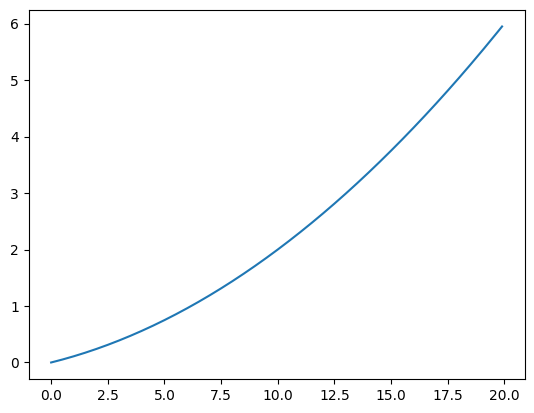

In [10]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.plot(x, y)
plt.show()


In [12]:
print(numerical_diff(function_1,5))
print(numerical_diff(function_1,10))

0.1999999999990898
0.2999999999986347


$$
y = 0.01x^2 + 0.1x  \\ 
y^{'} =  \frac{dy}{dx} = 0.02x + 0.1 \\
y^{'}(5) = 0.02*5 + 0.1 = 0.2 \\
y^{'}(10) = 0.02 * 10 +0.1 = 0.3 \\
$$

### 4.3.3 偏导数

$$
f(x_0,x_1) = x_0^2 + x_1^2              \qquad \qquad (4.6)
$$


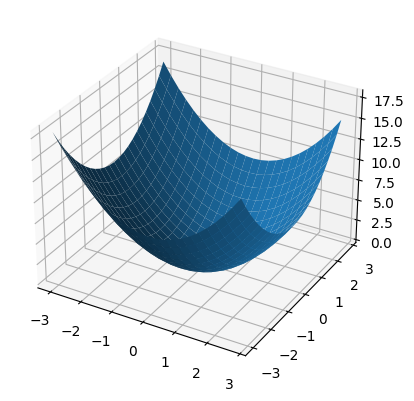

In [9]:
def function_2(x):
    return x[0]**2 + x[1]**2

import numpy as np
# draw a 3D graph of the function
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x0 = np.arange(-3.0, 3.0, 0.25)
x1 = np.arange(-3.0, 3.0, 0.25)

X, Y = np.meshgrid(x0, x1)
Z = function_2(np.array([X, Y]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.plot_surface(X, Y, Z)
plt.show()